# DTSC670: Foundations of Machine Learning Models

## Assignment 7: Polynomial Regression I

#### Name:

### CodeGrade
Please note that this assignment will be manually graded.  **You will have one attempt at submitting this assignment.**

Since we are merely using CodeGrade for this assignment as a platform to manually grade assignments, CodeGrade will not  execute your code for this assignment. Rather, it simply renders your Jupyter Notebook in the web browser. Therefore, any code blocks that generate output must be fully executed within the notebook prior to submission. Otherwise, we will not see the output of your code!

### Details
The purpose of this assignment is expose you to a polynomial regression problem. Your goal is to:

1. Create the following figure using matplotlib, which plots the data from the file called `PolynomialRegressionData_I.csv`.  This figure is generated using the same code that you developed in Assignment 3 of Module 2 - you should reuse that same code.
2. Perform a PolynomialFeatures transformation, then perform linear regression to calculate the optimal ordinary least squares regression model parameters.
3. Recreate the first figure by adding the best fit curve to all subplots.
4. Infer the true model parameters.

Below is the first figure you must emulate:

<img src="PolynomialDataPlot_I.png" width ="800" />

Below is the second figure you must emulate:

<img src="PolynomialDataPlot_II.png" width ="800" />

Each of the two figures has four subplots.  Note the various viewing angles that each subplot presents - you can achieve this with the [view_init()](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) method. Use the same color scheme for the datapoints shown here, which is called `jet`.  Be sure to label your axes as shown.

In [1]:
# Common imports
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np
import pandas as pd
import os
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
FOLDER = "figures"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, FOLDER)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Import Data

Begin by importing the data from the file called `PolynomialRegressionData_I.csv`.

In [2]:
poly_scat_plot = pd.read_csv("PolynomialRegressionData_I.csv")
   
poly_scat_plot

,x,y,z
0,-3.319120,-2.070820,-960.075064
1,8.812980,8.055306,109.527857
2,-19.995425,-19.407131,4867.408412
3,-7.906697,-7.559838,-149.039706
4,-14.129764,-12.762732,1493.048153
...,...,...,...
70,16.136077,14.321014,2411.074946
71,-14.501012,-13.816762,1938.853959
72,-14.428946,-14.396914,2201.489750
73,12.295652,12.491922,1595.894422


# Create First Image 

Use the [scatter3D](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) to plot in three dimensions.  Create four [subplots](https://matplotlib.org/3.1.0/gallery/recipes/create_subplots.html) with the appropriate viewing angles using the [view_init()](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) function.

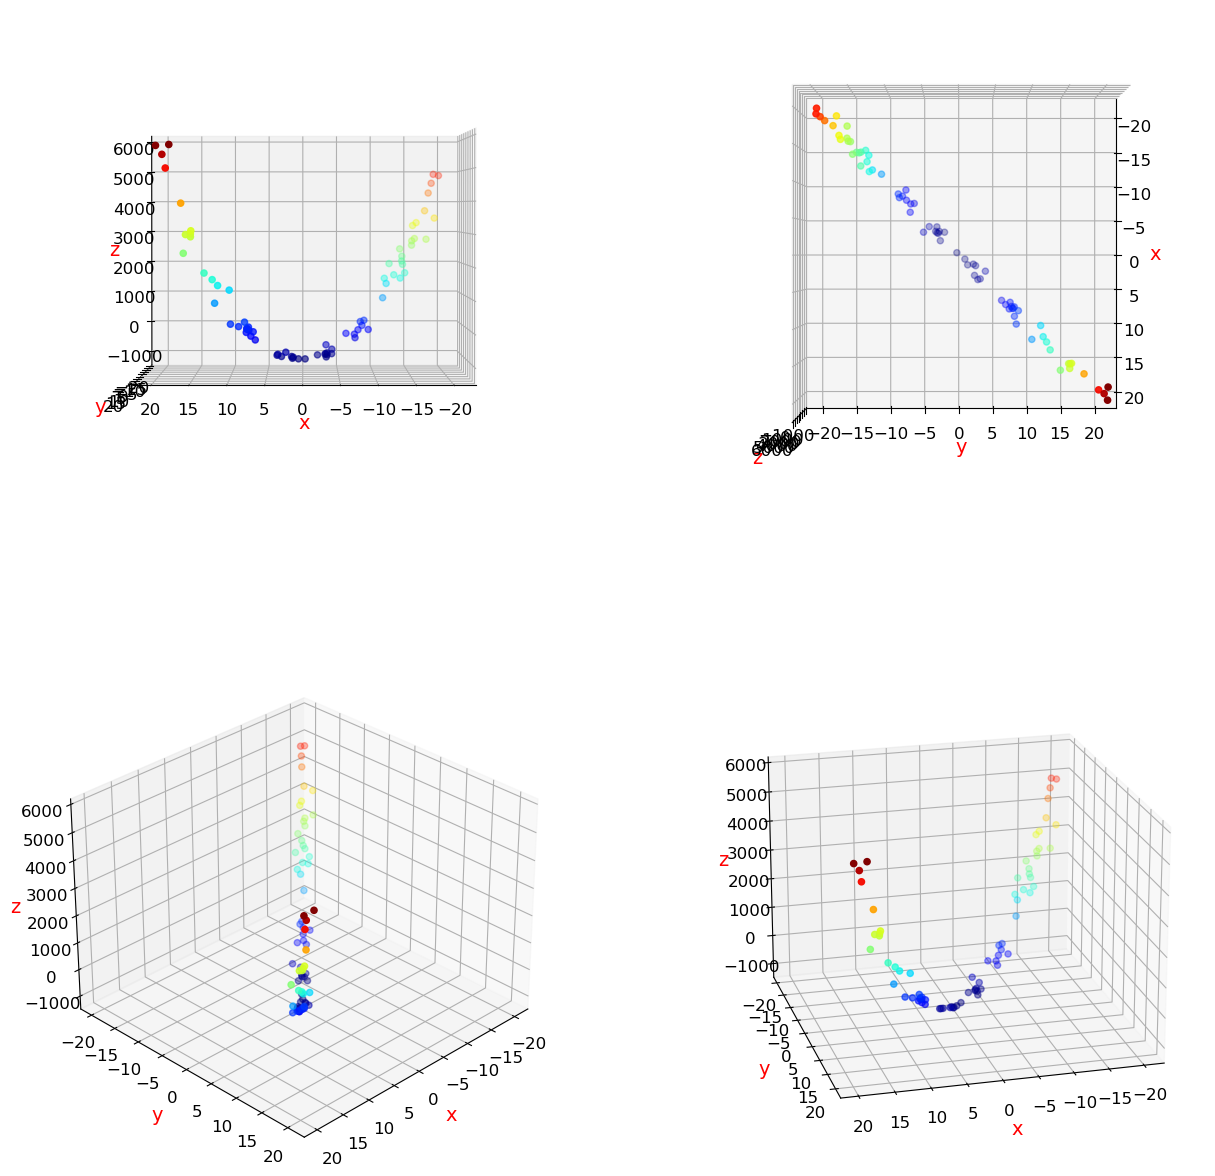

In [3]:
from mpl_toolkits.mplot3d import Axes3D

# Data for 3-dimensional scatter points
xdots = poly_scat_plot['x'].values
ydots = poly_scat_plot['y'].values
zdots = poly_scat_plot['z'].values

# Create the figure and subplots
fig, axs = plt.subplots(2, 2, figsize=[15, 15], subplot_kw={'projection': '3d'})

# First subplot
axs[0, 0].view_init(1, 90)
axs[0, 0].scatter3D(xdots, ydots, zdots, c=zdots, cmap='jet')
axs[0, 0].set_xlabel('x', color='red')
axs[0, 0].set_ylabel('y', color='red')
axs[0, 0].set_zlabel('z', color='red')

# Second subplot
axs[0, 1].view_init(90, 0)
axs[0, 1].scatter3D(xdots, ydots, zdots, c=zdots, cmap='jet')
axs[0, 1].set_xlabel('x', color='red')
axs[0, 1].set_ylabel('y', color='red')
axs[0, 1].set_zlabel('z', color='red')

# Third subplot
axs[1, 0].view_init(30, 45)
axs[1, 0].scatter3D(xdots, ydots, zdots, c=zdots, cmap='jet')
axs[1, 0].set_xlabel('x', color='red')
axs[1, 0].set_ylabel('y', color='red')
axs[1, 0].set_zlabel('z', color='red')

# Fourth subplot
axs[1, 1].view_init(20, 75)
axs[1, 1].scatter3D(xdots, ydots, zdots, c=zdots, cmap='jet')
axs[1, 1].set_xlabel('x', color='red')
axs[1, 1].set_ylabel('y', color='red')
axs[1, 1].set_zlabel('z', color='red')


plt.subplots_adjust(hspace=0.3, wspace=0.3)

# Perform Polynomial Features Transformation

Perform a polynomial transformation on your features.

In [4]:
from sklearn.preprocessing import PolynomialFeatures

# Basically, the same as the lecture and notebook from our textbook. RMSE =  0.8237793726283471 and the line of best fit 
# looks great. So, I don't see a reason to change the degre or include bias.
trans_poly_feat = PolynomialFeatures(degree=2, include_bias = False)
X_poly = trans_poly_feat.fit_transform(poly_scat_plot[['x', 'y']])

# Train Linear Regression Model

From the `sklearn.linear_model` library, import the `LinearRegression` class.  Instantiate an object of this class called `model`, and fit it to the data. `x` and `y` will be your training data and `z` will be your response. Print the optimal model parameters to the screen by completing the following `print()` statements.

In [5]:
from sklearn.linear_model import LinearRegression

# And, just like the class video and textbook.
model = LinearRegression()
model.fit(X_poly, poly_scat_plot['z'])

LinearRegression()

In [6]:
print("Computed Model Coefficients: ", model.coef_)
print("Computed Model Intercept : ", model.intercept_)

Computed Model Coefficients:  [ 8.09457649 -0.09962593 -0.05144212  0.10558512 15.94863437]
Computed Model Intercept :  -1000.1381149275458


# Create Second Image

Use the following `x_fit` and `y_fit` data to compute `z_fit` by invoking the model's `predict()` method.  This will allow you to plot the line of best fit that is predicted by the model.

In [7]:
# Plot Curve Fit
x_fit = np.linspace(-21,21,1000)
y_fit = x_fit

X_fit_poly = trans_poly_feat.transform(pd.DataFrame({'x': x_fit, 'y': y_fit}))
z_fit = model.predict(X_fit_poly)

Recreate the first image, but plot the line of best fit in each of the subplots as well.

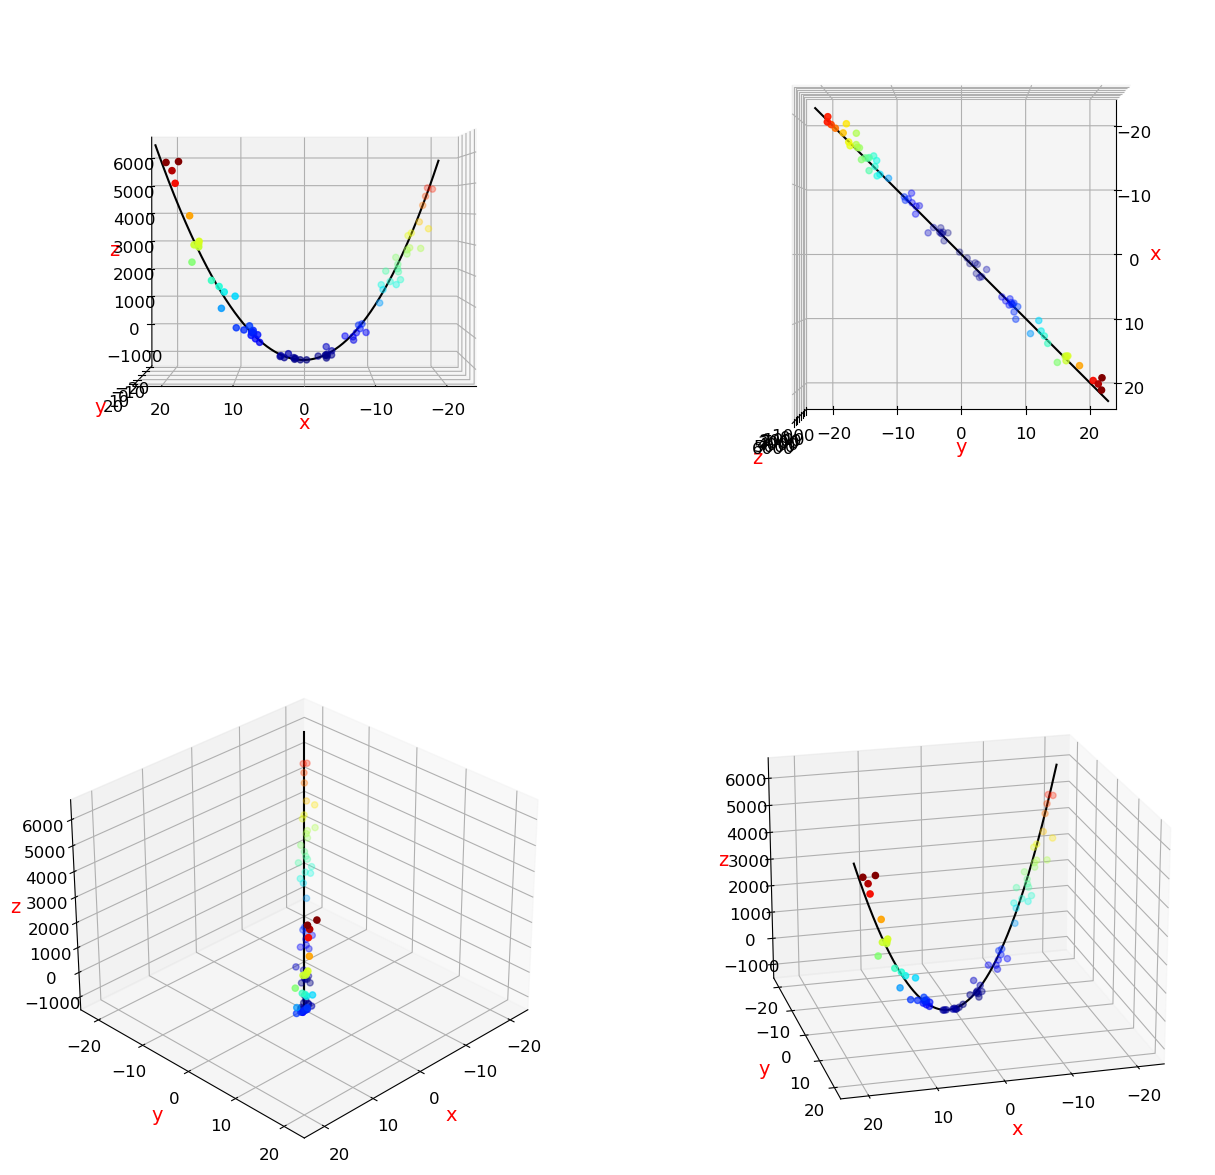

In [8]:
# Create the figure and subplots
fig, axs = plt.subplots(2, 2, figsize=[15, 15], subplot_kw={'projection': '3d'})

# First subplot with fitted line
axs[0, 0].view_init(1, 90)
axs[0, 0].plot3D(x_fit, y_fit, z_fit, 'black')
axs[0, 0].scatter3D(xdots, ydots, zdots, c=zdots, cmap='jet')
axs[0, 0].set_xlabel('x', color='red')
axs[0, 0].set_ylabel('y', color='red')
axs[0, 0].set_zlabel('z', color='red')

# Second subplot with fitted line
axs[0, 1].view_init(90, 0)
axs[0, 1].plot3D(x_fit, y_fit, z_fit, 'black')
axs[0, 1].scatter3D(xdots, ydots, zdots, c=zdots, cmap='jet')
axs[0, 1].set_xlabel('x', color='red')
axs[0, 1].set_ylabel('y', color='red')
axs[0, 1].set_zlabel('z', color='red')

# Third subplot with fitted line
axs[1, 0].view_init(30, 45)
axs[1, 0].plot3D(x_fit, y_fit, z_fit, 'black')
axs[1, 0].scatter3D(xdots, ydots, zdots, c=zdots, cmap='jet')
axs[1, 0].set_xlabel('x', color='red')
axs[1, 0].set_ylabel('y', color='red')
axs[1, 0].set_zlabel('z', color='red')

# Fourth subplot with fitted line
axs[1, 1].view_init(20, 75)
axs[1, 1].plot3D(x_fit, y_fit, z_fit, 'black')
axs[1, 1].scatter3D(xdots, ydots, zdots, c=zdots, cmap='jet')
axs[1, 1].set_xlabel('x', color='red')
axs[1, 1].set_ylabel('y', color='red')
axs[1, 1].set_zlabel('z', color='red')

# Adjust the spacing between subplots so they display according to assignment specifications
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# Infer the True Model Parameters

Provided that the true model parameters are **integer values**, you are able to infer the true model parameters by rounding the coefficients and the intercept to the nearest integer value.  You may "hard-code" these values into the below print statements. (See the assignment 3 template for more information)

Use the `get_feature_names()` method of the `PolynomialFeatures` class to be certain of which coefficients you calculated!  You need to report your final answers in a format that is ___abundantly clear___ to me which coefficient corresponds to which ___poly feature___ of the model!  You may add more `print()` statements to accomplish this if you must.

In [9]:
# get_feature_names() doesn't work anymore. Had to use get_feature_names_out(). Also, could have zipped to a dictionary too.
trans_poly_feat_names = trans_poly_feat.get_feature_names_out()
poly_reg_coef = model.coef_

computed_coefficients = list(zip(trans_poly_feat_names, poly_reg_coef))

for name, coef in computed_coefficients:
    print("True Model Coefficient for", name, ":", round(coef))

print("True Model Intercept:", round(model.intercept_))

True Model Coefficient for x : 8
True Model Coefficient for y : 0
True Model Coefficient for x^2 : 0
True Model Coefficient for x y : 0
True Model Coefficient for y^2 : 16
True Model Intercept: -1000


In [10]:
from sklearn.metrics import mean_squared_error

# Everything looks good, but I only have one submission, so lets check RMSE
poly_scat_plot['z_pred'] = model.predict(X_poly)
rmse = np.sqrt(mean_squared_error(poly_scat_plot['z'], poly_scat_plot['z_pred']))

print("RMSE: ", rmse)

RMSE:  0.8237793726283471
